# Natural Language Processing 
Project Increment - 1


---


Title: **Sentimental Analysis for Monarchy in UK**


**Important Libraries**



1.   Numpy
* NumPy is a library for the Python programming language, adding support for large, multi-dimensional arrays and matrices, along with a large collection of high-level mathematical functions to operate on these arrays.

2.   Pandas

* Pandas is a software library written for the Python programming language for data manipulation and analysis. In particular, it offers data structures and operations for manipulating numerical tables and time series


3. scikit-learn

* Scikit-learn is an open source data analysis library, and the gold standard for Machine Learning (ML) in the Python ecosystem

4. NLTK

* The Natural Language Toolkit, or more commonly NLTK, is a suite of libraries and programs for symbolic and statistical natural language processing for English written in the Python programming language.

5. Seaborn

* Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.

6. SciPy
* SciPy is a free and open-source Python library used for scientific computing and technical computing. SciPy contains modules for optimization, linear algebra, integration, interpolation, special functions, FFT, signal and image processing, ODE solvers and other tasks common in science and engineering.

In [ ]:
#Importing numpy library
import numpy as np
#Importing pandas library
import pandas as pd
#Importing NLTK library
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import RegexpTokenizer
import string
#Importing Regular Expressions for various operations
import re
#Importing Scipy
import scipy.stats as stats
#Importing pylab
import pylab
#Importing Matplot
import matplotlib.pyplot as plt
#Importing Seaborn
import seaborn as sns
!pip install transformers
from transformers import AutoTokenizer

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import nltk
nltk.download('wordnet')
!python3 -m nltk.downloader wordnet
!unzip /root/nltk_data/corpora/wordnet.zip -d /root/nltk_data/corpora/

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


/usr/lib/python3.7/runpy.py:125: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
Archive:  /root/nltk_data/corpora/wordnet.zip
replace /root/nltk_data/corpora/wordnet/lexnames? [y]es, [n]o, [A]ll, [N]one, [r]ename: A
  inflating: /root/nltk_data/corpora/wordnet/lexnames  
  inflating: /root/nltk_data/corpora/wordnet/data.verb  
  inflating: /root/nltk_data/corpora/wordnet/index.adv  
  inflating: /root/nltk_data/corpora/wordnet/adv.exc  
  inflating: /root/nltk_data/corpora/wordnet/index.verb  
  inflating: /root/nltk_data/corpora/wordnet/cntlist.rev  
  inflating: /root/nltk_data/corpora/wordnet/data.adj  
  inflating: /root/nltk_data/corpora/wordnet/index.adj  
  inflating: /root/nltk_data/corpora/wordnet/LICENSE  
  i

**Important functions**

In [ ]:
def stopwordsRemovalFn(text):
    return " ".join([word for word in str(text).split() if word not in stop_words])

def punctuationRemovalFn(text):
    english_punctuations = string.punctuation
    translator = str.maketrans('', '', english_punctuations)
    return text.translate(translator)

def repeatingCharacterRemovalFn(text):
    return re.sub(r'(.)1+', r'1', text)

def cleaningHTMLDataFn(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)

def removingNumbersFn(data):
    return re.sub('[0-9]+', '', data)

def lemmatizeDataFn(data):
    text = [lm.lemmatize(word) for word in data]
    return data

def textClassification(score):
  if score < 0:
    return "Negative"
  elif score == 0:
    return "Neutral"
  else:
    return "Positive"

# Dataset Information

In [ ]:
queenTweetsDf = pd.read_csv("/content/queen.csv")
queenTweetsDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190325 entries, 0 to 190324
Data columns (total 36 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               190325 non-null  int64  
 1   conversation_id  190325 non-null  int64  
 2   created_at       190325 non-null  object 
 3   date             190325 non-null  object 
 4   time             190325 non-null  object 
 5   timezone         190325 non-null  int64  
 6   user_id          190325 non-null  int64  
 7   username         190325 non-null  object 
 8   name             190315 non-null  object 
 9   place            228 non-null     object 
 10  tweet            190325 non-null  object 
 11  language         190325 non-null  object 
 12  mentions         190325 non-null  object 
 13  urls             190325 non-null  object 
 14  photos           190325 non-null  object 
 15  replies_count    190325 non-null  int64  
 16  retweets_count   190325 non-null  int6

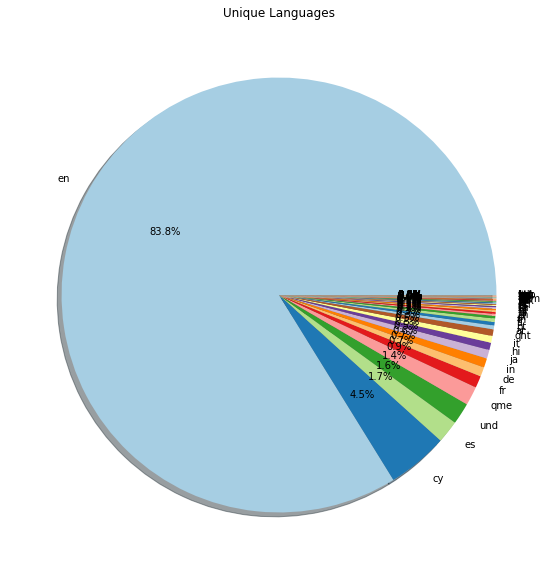

In [ ]:
plt.figure(figsize=(10,10))
color_palette = sns.color_palette("Paired")
plt.pie(queenTweetsDf.language.value_counts(), labels=queenTweetsDf.language.value_counts().index, autopct="%1.1f%%", colors=color_palette, shadow=True)
plt.title("Unique Languages")
plt.show()


> Pie chart displaying portion of languages in the dataset



In [ ]:
filteredColumns = ["tweet", "language"]
queenTweetsDf = pd.read_csv("queen.csv", usecols=filteredColumns)
#The content before filtering out the Tweets only containg English Language
print(queenTweetsDf)
print(queenTweetsDf[queenTweetsDf.language=='en'])
#The content after Filtering out the Tweets that only contain English Language
tweetInEn=queenTweetsDf[queenTweetsDf.language=='en']
print(tweetInEn)
data=tweetInEn.tweet
print(data)

                                                    tweet language
0       We at In Professional Development join with pe...       en
1       Join us in remembering Her Majesty Queen Eliza...       en
2       "When life seems hard, the courageous do not l...       en
3       We join the nation in mourning the death of He...       en
4       We are saddened by the death of Her Majesty Qu...       en
...                                                   ...      ...
190320  Queen Elizabeth II, Britain's longest-reigning...       en
190321  Queen Elizabeth II dies at age 96  https://t.c...       en
190322  GOD SAVE THE KING !! Today a figure of our his...       en
190323  70 years. ⠀⠀ 15 Prime Ministers. ⠀⠀ 13 America...       en
190324  She wasn't perfect but she was great, an insti...       en

[190325 rows x 2 columns]
                                                    tweet language
0       We at In Professional Development join with pe...       en
1       Join us in remembering Her 

In [ ]:
#Printing the dictionary of stopwords downloaded from NLTK corpus
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))
print(stop_words)

{'wouldn', 'between', "couldn't", 'more', 'up', 'during', 'them', 'against', 'no', 'this', 'here', 'too', 'why', "aren't", 'yourself', 'on', "didn't", 'weren', 'in', 'nor', 'y', 'into', 'themselves', 'haven', 'mustn', "won't", 'or', "needn't", 'ma', 'while', 'have', 'shouldn', 'about', 's', 'down', 'do', 'and', 'we', 'being', 'once', 'of', 'to', 'but', 'all', 'it', 'as', 'can', "mustn't", 'through', 'am', 'her', 'out', 'where', 'should', 'wasn', 'few', 'only', 'couldn', 'if', 'won', 'these', 'they', 'has', 'aren', 'myself', 'him', 've', 'just', 'you', 'hers', 'very', "weren't", 'are', 'most', 'yours', 'isn', 'did', 'was', 'so', "you're", 'been', 'hadn', 'their', 'had', 'our', "isn't", 'mightn', 'by', 'for', 'd', "wouldn't", 'hasn', 'needn', 'some', "that'll", "shouldn't", 'same', 'theirs', 'each', 'don', 're', "hadn't", "hasn't", 'until', "you've", 'i', "it's", 'he', 'what', 'be', 'a', 'at', 'then', "she's", 'ain', 'll', 'now', "wasn't", 'not', 'when', 'himself', 'm', 'above', 'its', '

## **Stopwords removal**

In [ ]:
data = data.apply(lambda text: stopwordsRemovalFn(text))
#Printing data after removing the stopwords
data.head()

0    We In Professional Development join people acr...
1    Join us remembering Her Majesty Queen Elizabet...
2    "When life seems hard, courageous lie accept d...
3    We join nation mourning death Her Majesty Quee...
4    We saddened death Her Majesty Queen Elizabeth ...
Name: tweet, dtype: object

## **Punctuation removal**

In [ ]:
data=data.apply(lambda x: punctuationRemovalFn(x))
#Printing data after removing punctuation from the dataset
data.tail()

190320    Queen Elizabeth II Britains longestreigning mo...
190321    Queen Elizabeth II dies age 96 httpstcon5hYC6Q...
190322    GOD SAVE THE KING  Today figure history centur...
190323    70 years ⠀⠀ 15 Prime Ministers ⠀⠀ 13 American ...
190324    She perfect great institution constant world S...
Name: tweet, dtype: object

## **Removing repeated characters**

In [ ]:
data= data.apply(lambda x: repeatingCharacterRemovalFn(x))
#Printing data after removing repeating characters removal
data.tail()

190320    Queen Elizabeth II Britains longestreigning mo...
190321    Queen Elizabeth II dies age 96 httpstcon5hYC6Q...
190322    GOD SAVE THE KING  Today figure history centur...
190323    70 years ⠀⠀15 Prime Ministers ⠀⠀13 American Pr...
190324    She perfect great institution constant world S...
Name: tweet, dtype: object

## **Cleaning URLs / HTML Data**

In [ ]:
  data= data.apply(lambda x: cleaningHTMLDataFn(x))
  #Printing data after removing URL or any HTML Data in the dataset
  data.tail()


190320    Queen Elizabeth II Britains longestreigning mo...
190321    Queen Elizabeth II dies age 96 httpstcon5hYC6Q...
190322    GOD SAVE THE KING  Today figure history centur...
190323    70 years ⠀⠀15 Prime Ministers ⠀⠀13 American Pr...
190324    She perfect great institution constant world S...
Name: tweet, dtype: object

## **Filtering Numbers**

In [ ]:
data = data.apply(lambda x: removingNumbersFn(x))
#Removing any numbers taht are in the dataset
data.tail()

190320    Queen Elizabeth II Britains longestreigning mo...
190321    Queen Elizabeth II dies age  httpstconhYCQMpq ...
190322    GOD SAVE THE KING  Today figure history centur...
190323     years ⠀⠀ Prime Ministers ⠀⠀ American Presiden...
190324    She perfect great institution constant world S...
Name: tweet, dtype: object

## **Tokenization**

In [ ]:
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")
#Printing tokens after tokenizing with the help of DistilBERT base model
data = data.apply(tokenizer.tokenize)
data.head()

0    [we, in, professional, development, join, peop...
1    [join, us, remembering, her, majesty, queen, e...
2    [when, life, seems, hard, courageous, lie, acc...
3    [we, join, nation, mourning, death, her, majes...
4    [we, sad, ##dened, death, her, majesty, queen,...
Name: tweet, dtype: object

## **Lemmatization**

In [ ]:
lm = nltk.WordNetLemmatizer()
data = data.apply(lambda x: lemmatizeDataFn(x))
#Printing data after lemmatizing text with the help of lemmatize function from NLTK
data.head()

0    [we, in, professional, development, join, peop...
1    [join, us, remembering, her, majesty, queen, e...
2    [when, life, seems, hard, courageous, lie, acc...
3    [we, join, nation, mourning, death, her, majes...
4    [we, sad, ##dened, death, her, majesty, queen,...
Name: tweet, dtype: object

# Sentiment Analysis

In [ ]:
from textblob import TextBlob
from tqdm import tqdm
from statistics import mean
import json

tqdm.pandas()
queenTweetsDf['sentiment'] = queenTweetsDf['tweet'].progress_apply(lambda x : TextBlob(x).sentiment[0])

# calculate the average of the last column


100%|██████████| 190325/190325 [01:18<00:00, 2439.80it/s]


In [ ]:
avgSen = mean(queenTweetsDf['sentiment'])
print (queenTweetsDf)

                                                    tweet language  sentiment
0       We at In Professional Development join with pe...       en   0.100000
1       Join us in remembering Her Majesty Queen Eliza...       en   0.150000
2       "When life seems hard, the courageous do not l...       en   0.110556
3       We join the nation in mourning the death of He...       en   0.000000
4       We are saddened by the death of Her Majesty Qu...       en   0.000000
...                                                   ...      ...        ...
190320  Queen Elizabeth II, Britain's longest-reigning...       en  -0.050000
190321  Queen Elizabeth II dies at age 96  https://t.c...       en   0.000000
190322  GOD SAVE THE KING !! Today a figure of our his...       en  -0.200000
190323  70 years. ⠀⠀ 15 Prime Ministers. ⠀⠀ 13 America...       en  -0.300000
190324  She wasn't perfect but she was great, an insti...       en   0.495238

[190325 rows x 3 columns]


In [ ]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
le.fit(queenTweetsDf.sentiment)
queenTweetsDf['categorical_label'] = le.transform(queenTweetsDf.sentiment)
print(queenTweetsDf)

                                                    tweet language  sentiment  \
0       We at In Professional Development join with pe...       en   0.100000   
1       Join us in remembering Her Majesty Queen Eliza...       en   0.150000   
2       "When life seems hard, the courageous do not l...       en   0.110556   
3       We join the nation in mourning the death of He...       en   0.000000   
4       We are saddened by the death of Her Majesty Qu...       en   0.000000   
...                                                   ...      ...        ...   
190320  Queen Elizabeth II, Britain's longest-reigning...       en  -0.050000   
190321  Queen Elizabeth II dies at age 96  https://t.c...       en   0.000000   
190322  GOD SAVE THE KING !! Today a figure of our his...       en  -0.200000   
190323  70 years. ⠀⠀ 15 Prime Ministers. ⠀⠀ 13 America...       en  -0.300000   
190324  She wasn't perfect but she was great, an insti...       en   0.495238   

        categorical_label  

In [ ]:
print(avgSen)

0.07160620605820173


## **True Positive and True Negative**

In [ ]:
#Initalizing true_positive/negative/neutral variables 
true_positive=0
true_negative=0
positive=0
negative=0
neutral=0
#Calculating the total length of the dataframe 
total=len(queenTweetsDf)
#Iterating through the 'queenTweetsDf' and calculating the scores of true positive / true negative and neutral. 
for i in range(total):
  score=queenTweetsDf['sentiment'][i]
  if score < (-0.15):
    true_negative=true_negative+1
  elif score == 0:
    neutral=neutral+1
  elif score>(0.15):
    true_positive=true_positive+1
  if score>0:
    positive=positive+1
  if score<0:
    negative=negative+1
#Displaying the total number of positive/negative/neutral tweets available in the dataset
print("Total Number of Tweets:",total)
print("Number of Positive Tweets:",positive)
print("Number of True Positive Tweets:",true_positive)
print("Number of Negative Tweets:",negative)
print("Number of True Negative Tweets:",true_negative)
print("Number of Neutral Tweets:",neutral)

Total Number of Tweets: 190325
Number of Positive Tweets: 61548
Number of True Positive Tweets: 44801
Number of Negative Tweets: 30105
Number of True Negative Tweets: 15344
Number of Neutral Tweets: 98672


## **Text Classification**

In [ ]:
#Taking input from the user
tweet = input(f"\nEnter the tweet : ").lower()
print(tweet)


Enter the tweet : We are deeply saddened by the passing of Her Majesty Queen Elizabeth II.   We will be forever grateful for the extraordinary service she gave to the nation during her long and glorious reign.   Our thoughts are with the Royal Family at this time.  https://t.co/BK2TGSRN2f
we are deeply saddened by the passing of her majesty queen elizabeth ii.   we will be forever grateful for the extraordinary service she gave to the nation during her long and glorious reign.   our thoughts are with the royal family at this time.  https://t.co/bk2tgsrn2f


In [ ]:
#Stopword Removal
tweet=stopwordsRemovalFn(tweet)
#Punctuation Removal
tweet=punctuationRemovalFn(tweet)
#Removing repeated character
tweet=repeatingCharacterRemovalFn(tweet)
#CLeaning URLs/HTML Data
tweet=cleaningHTMLDataFn(tweet)
#Removing Numbers
tweet=removingNumbersFn(tweet)
tweet="".join(tweet)

In [ ]:
#Calculating and printing the sentiment score from the tweet that is preprocessed.
print(TextBlob(tweet).sentiment)
score=TextBlob(tweet).sentiment.polarity
print(textClassification(score))

Sentiment(polarity=0.09444444444444444, subjectivity=0.6)
Positive
